<a href="https://colab.research.google.com/github/airon14/CpE-AIML/blob/main/58034_Lab03_Millicheckers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
class LinearRegression_Simple():

  def covariance(vectA, vectB):
    x_bar = vectA.mean()
    y_bar = vectB.mean()
    x = vectA - x_bar
    y = vectB - y_bar
    covariance = np.mean(x*y)
    return print("cov(x,y)=", covariance)

  def pearsons(vectA,vectB):
    covariance = np.cov(vectA, vectB)[0,1]
    pearsons_r = covariance / (np.std(vectA)*np.std(vectB))
    return print("Pearsons_r=", pearsons_r)

  def train(X, y):
    global w0, w1
    std_x = np.std(X)
    std_y = np.std(y)
    w1 = np.corrcoef(X, y)[0,1]*(std_y/std_x)
    w0 = y.mean() - w1 * X.mean()
    return print("w0: ", w0, "w1: ", w1)

  def predict(X):
    global predict
    predict = w0 + w1 * X
    pred_sz = predict.size
    i=np.array(list(range(0,pred_sz)))
    return print("y_h=",predict, "index=",i)

  def evaluate():
    mse = np.mean(np.square(predict-y[0:5]))
    sse = np.sum(np.square(predict-y[0:5]))
    sst = np.sum(np.square(y-y.mean()))
    rmse = np.sqrt(mse)
    ssr = np.sum(np.square(predict - y.mean()))
    r_squared = 1 - (sse/sst)
    k = 1
    s = y.size
    adjusted_rsqrd =  1-((1-r_squared)*(s - 1)/(s-k-1))
    evaluate_df = {"SST": sst, "SSR": ssr, "SSE": sse, "MSE": mse, "RMSE": rmse, "R-squared": r_squared, "Adjusted R-squared": adjusted_rsqrd}
    return evaluate_df

  def visualize():
    plt.figure(figsize=(10,8))
    plt.title("Visualization")
    plt.grid()
    plt.scatter(X[0:5], y[0:5])
    plt.plot(X[0:5], predict, color='blue')
    return plt.show()
  ### Program the required methods


In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [ ]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = LinearRegression_Simple.covariance(X,y)
cov

cov(x,y)= -452.096668199532


Expected output value:
$$cov_{x,y} = -456.66$$

In [ ]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = LinearRegression_Simple.pearsons(X,y)
r

Pearsons_r= -0.9142226177028621


Expected output value:
$$r = -0.90$$

In [ ]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
LinearRegression_Simple.train(X,y)
#regressor.model_

w0:  -9.378797103736634 w1:  -0.5425702588653248


Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54 \\ -9.38\end{bmatrix}$$

In [ ]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = LinearRegression_Simple.predict(X_test[:5])
preds

y_h= [-63.63582299 -64.17839325 -64.72096351 -65.26353377 -65.80610403] index= [0 1 2 3 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = LinearRegression_Simple.evaluate()
model_stats

{'Adjusted R-squared': 0.49158237791544657,
 'MSE': 3014.077744872599,
 'R-squared': 0.49671790945165417,
 'RMSE': 54.900616980800855,
 'SSE': 15070.388724362994,
 'SSR': 4059.9024573607667,
 'SST': 29944.21817780801}

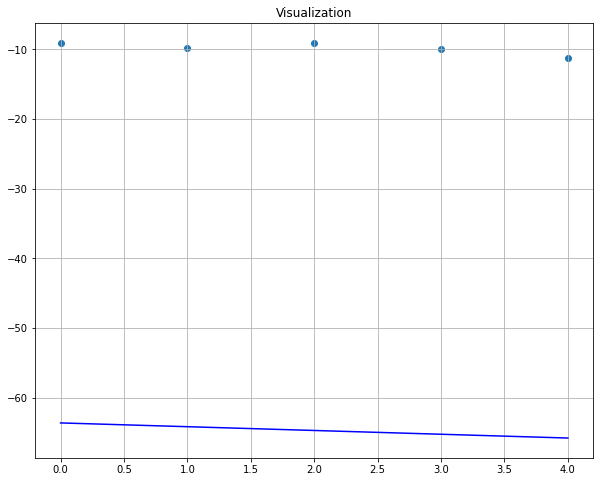

In [ ]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
LinearRegression_Simple.visualize()